# Índice
- [Introducción](#introducción)
- [Librerías Utilizadas](#librerias)
- [Análisis Exploratorio](#exploratory) 
- [Hipótesis](#hip)
  - [Hipótesis 1: Relación entre variables](#hip1)
  - [Hipótesis 2: Caracterizacion por tipo](#hip2)
    - [Hipótesis 2.1: Variables para riesling](#hip2.1)
    - [Hipótesis 2.2: Variables para garnacha](#hip2.2)
  - [Hipótesis 3: Impacto de variable citric acid](#hip3)
  - [Hipótesis 4: Impacto de variable volatile acidity](#hip4)
- [Conclusión](#con)


# Introducción <a id="introducción"></a>

El objetivo de este trabajo es realizar un análisis exploratorio y predictivo sobre el dataset “winequality_BR.csv”, utilizando técnicas vistas en la cátedra Fundamentos de la Ciencia de Datos. A partir de este análisis se busca identificar las variables más relevantes, realizar un proceso de limpieza de datos y evaluar distintas hipótesis relacionadas con la calidad y las características físico-químicas de los vinos. 

El dataset contiene observaciones de dos variedades de vino: Riesling (blanco) y Garnacha (tinto). Para cada muestra se registran diversas variables numéricas asociadas a su composición química, junto con una variable numérica cualitativa que representa la calidad del vino.

A partir del conocimiento del dominio y lo descrito por los datos, se plantean las siguientes hipótesis de interés:



- hipótesis 1: La calidad de un vino es independiente de su volumen alcohólico. Se considera que el grado alcohólico es un parámetro objetivo que no debería tener influencia significativa en la asignación de la calidad.


- hipótesis 2: Las variables quimicas que caracterizan un vino difieren según el tipo de vino (Riesling o    Garnacha).

    - hipótesis 2.1: Las variables total sulfur dioxide, residual sugar, y citric acid aumentan la probabilidad de que el vino sea Riesling. 

    - hipótesis 2.2:Las variables alcohol y density se asocian más fuertemente a la clasificación de vinos Garnacha.
    
- hipótesis 3:El ácido cítrico no tiene un impacto significativo en la calidad de los vinos Riesling, pero sí podría influir en la calidad de los vinos Garnacha.

- hipótesis 4: La acidez volátil no impacta en la calidad del vino de la misma manera para los distintos tipos

    - hipótesis 4.1: La acidez volátil influye en la calidad del vino Garnacha

    - hipótesis 4.2: La acidez volátil no influye en la calidad del vino Riesling

# Librerias Utilizadas <a id="librerias"></a>
Aquí va la descripción de las librerias utilizadas.

In [ ]:
 # Se importan las librerías necesarias


from os import path

from wget import download

import pandas as pd # Manipulación y análisis de datos
import numpy as np # Cálculos numéricos 
import  matplotlib.pyplot as plt # Visualización de datos
import ydata_profiling as pp # Perfilado de datos 
import seaborn as sns # Visualización de datos avanzada

# Scipy
import scipy.stats as stats # Estadísticas
from scipy.stats import kstest # Prueba de Kolmogorov-Smirnov
from scipy.stats import shapiro # Prueba de normalidad de Shapiro-Wilk

# Scikit-learn

from sklearn.cluster import KMeans # Algoritmo de clustering K-Means
from sklearn.decomposition import PCA # Análisis de componentes principales
from sklearn.preprocessing import StandardScaler # Estandarización de datos

from sklearn.model_selection import train_test_split # División de datos en conjuntos de entrenamiento y prueba
from sklearn.preprocessing import LabelEncoder # Codificación de variables categóricas
from sklearn.model_selection import GridSearchCV  # Búsqueda en cuadrícula para optimización de hiperparámetros
from sklearn.metrics import accuracy_score, confusion_matrix # Métricas de evaluación
from sklearn.metrics import classification_report  # Informe de clasificación



##### Cargamos el dataframe "winequiality_BR.csv"

In [ ]:

#https://github.com/agustinbx/DataSet-Trabajo/winequality_BR.csv



# descargamos la base de datos
if not path.exists("winequality_BR.csv"):
  download("https://github.com/agustinbx/DataSet-Trabajo/raw/main/winequality_BR.csv")
else:
  print("File already exists!")

# Analisis Exploratorio <a id="exploratory"></a>


In [ ]:
#Se genera una copia del dataset para trabajar sobre ella
raw_ds = pd.read_csv("winequality_BR.csv", delimiter=';') 
winesDf = raw_ds.copy() 
winesDf 

##### Eliminación de columnas irrelevantes
Antes de avanzar hacia un análisis más profundo, es conveniente remover aquellas columnas que no aportan información útil. En este caso, se eliminan las columnas que contienen únicamente valores NaN, ya que no contribuyen al análisis y pueden generar ruido. Además, se descartan las columnas de identificación (ID), dado que no poseen valor analítico ni predictivo

In [ ]:
winesDf= winesDf.dropna(axis=1,how="all")
winesDf

##### Revisión inicial de los datos

Como primer paso del análisis exploratorio, es importante revisar la estructura general del dataset para comprender con qué tipos de datos estamos trabajando y evaluar si las variables se encuentran en buen estado. Además, verifico la presencia de valores faltantes, ya que estos pueden afectar a la calidad del análisis.

In [ ]:
winesDf.isna().sum() #con esta linea de codigo verifico cuantos valores nulos tenemos en el csv y los sumo

Como se puede observar las columnas que solo contenian valores nulos ya no estan presentes en el dataset. 

### Descripcion de las columnas
type: tipo de uva con la que se elabora el vino. 

fixed acidity: cantidad de ácidos no volátiles presentes en el vino, medida en gramos por litro.
La variable fixed acidity contiene el conjunto de acidos naturales presentes en el vino (incluyendo al acido citrico). Estos no son acidos volatiles, sino que son acidos naturales que aportan al balance de acidez y el gusto del vino. medida en gramos por litro.

volatile acidity: La acidez volatil, son aquellos acidos volatiles o gaseosos presentes en el vino. valores normales los situan entre 0.3 g/l y 0.6 g/l. En general si este valor sobrepasa 1 g/l se suele indicar que el vino esta "picado", es decir presenta ciertos aromas y gustos avinagrados desagradables. Medida en gramos por litro.

citric acid: El acido citrico es uno de los acidos naturales que se pueden encontrar en el vino y es tambien parte de los acidos que componen la fixed acidity. Este le aporta al vino sabores citricos. Medido en gramos por litro.

residual sugar: El azucar residual es azucar libre en el vino que no se descompuso para formar alcohol. Esta es responsable del dulzor del vino. Esta pueden clasificar el vino en seco (0-9), semiseco (9-18), semidulce (18-50) y dulce (mayor 50). Medida en gramos por litro. 

chlorides: Los cloruros son la concentracion de sales minerales presentes en el vino y que pueden afectar a su calidad y sabor, medida en gramos por litro.

free sulfur dioxide: cantidad de dióxido de azufre que no está ligado químicamente en el vino, medida en miligramos por litro. 

total sulfur dioxide: suma del dióxido de azufre libre y el combinado en el vino, medida en miligramos por litro.

density: La densidad de un vino es percibida como la estructura del vino o espesor en boca. Este valor suele ser similar a la densidad del agua que ronda los 1g/ml, medida en gramos por mililitro.

pH: medida de la acidez o alcalinidad del vino. 

sulphates: concentración de sales de sulfato en el vino, medida en gramos por litro.

alcohol: contenido alcohólico del vino, medido en porcentaje de volumen (% vol).

quality: puntuación del vino, con una escala que va de 0 a 10.

In [ ]:
winesDf.info()



Al inspeccionar los tipos de datos del dataset se observa que la columna alcohol aparece como tipo object, cuando debería ser una variable numérica (float64). Esto sugiere que existen valores mal formateados que impiden a Pandas interpretarlos correctamente.
Analizando el dataset se hallaron 6 filas donde el alcohol esta mal representado, figuran valores como el siguiente:
                                                                
- Garnacha;11.6;0.475;0.4;1.4;0.091;6;28;0.99704;3.07;0.65; 100.333.333.333.333 ;6;;;

Dado que la cantidad de registros afectados es muy pequeña respecto al total del dataset, se opta por imputar los valores faltantes utilizando el promedio del alcohol del resto de los vinos.

In [ ]:
#convierto los datos erroneos en NaN
winesDf["alcohol"] = pd.to_numeric(winesDf["alcohol"],errors='coerce')

#calculo el promedio de % de volumen alcoholico entre los vinos de los cuales si tengo los datos
prom = winesDf['alcohol'].mean()
winesDf['alcohol'].fillna(prom,inplace= True)
# Detectar valores incorrectos en la columna 'alcohol' (más de un punto)
#winesDf.loc[winesDf['alcohol'].str.contains(r'\.\d+\.\d+', na=False), 'alcohol'] = 10.0
#winesDf["alcohol"] = pd.to_numeric(winesDf["alcohol"],errors='coerce')
winesDf.info()

##### Unificación de unidades para facilitar el análisis
La mayoría de las variables cuantitativas estan expresadas en g/L, con excepción de:

density, expresada en g/mg,
free sulfur dioxide y total sulfur dioxide, expresados en mg/L,
pH, que es adimensional.

Para mantener coherencia entre unidades y facilitar la comparación entre variables, se convierten las variables expresadas en mg/L a g/L, aplicando un factor de conversión estándar (1 g = 1000 mg).

In [ ]:
winesDf['free sulfur dioxide'] = winesDf['free sulfur dioxide'] / 1000
winesDf['total sulfur dioxide'] = winesDf['total sulfur dioxide'] / 1000
winesDf

##### Evaluación de valores anómalos

Como paso complementario dentro del análisis exploratorio, se realiza una verificación de valores que puedan considerarse anómalos o fuera de la norma para cada variable del dataset. Detectar estos outliers es fundamental para evaluar su impacto en el análisis y decidir si deben corregirse, reemplazarse o simplemente documentarse.

In [ ]:
winesDf.describe()

##### Tratamiento de valores atípicos en la columna density
Al analizar la distribución de las variables numéricas, se detectó que la columna density contiene algunos valores atípicos extremadamente altos, claramente fuera del rango esperable para la densidad de un vino. Estos valores muy posiblemente corresponden a errores de registro.

Dado que la cantidad de registros afectados es muy pequeña, y con el fin de evitar distorsiones en el análisis estadístico posterior, ya que son pocos valores se decide reemplazar estos valores incorrectos por el promedio de la densidad calculado a partir de los datos válidos.

In [ ]:
winesDf.loc[winesDf['density'] > 2, 'density'] = np.nan
mean_density = winesDf['density'].mean()
winesDf['density'].fillna(mean_density, inplace=True)
winesDf.info()

### Visualizacion de datos
Los datos ya estan curados por lo que podemos proceder a visualizarlos.

En esta sección se analizarán las variables de forma individual y conjunta, con el objetivo de obtener una primera interpretación gráfica del comportamiento de los datos.



##### Visualizacion de datos mediante histogramas

Como primer acercamiento visual, se generan histogramas para cada una de las variables numéricas del dataset. Este tipo de gráfico permite observar de forma clara la distribución de los datos, evaluar si siguen una forma aproximadamente normal, detectar asimetrías y identificar la presencia de valores atípicos. 

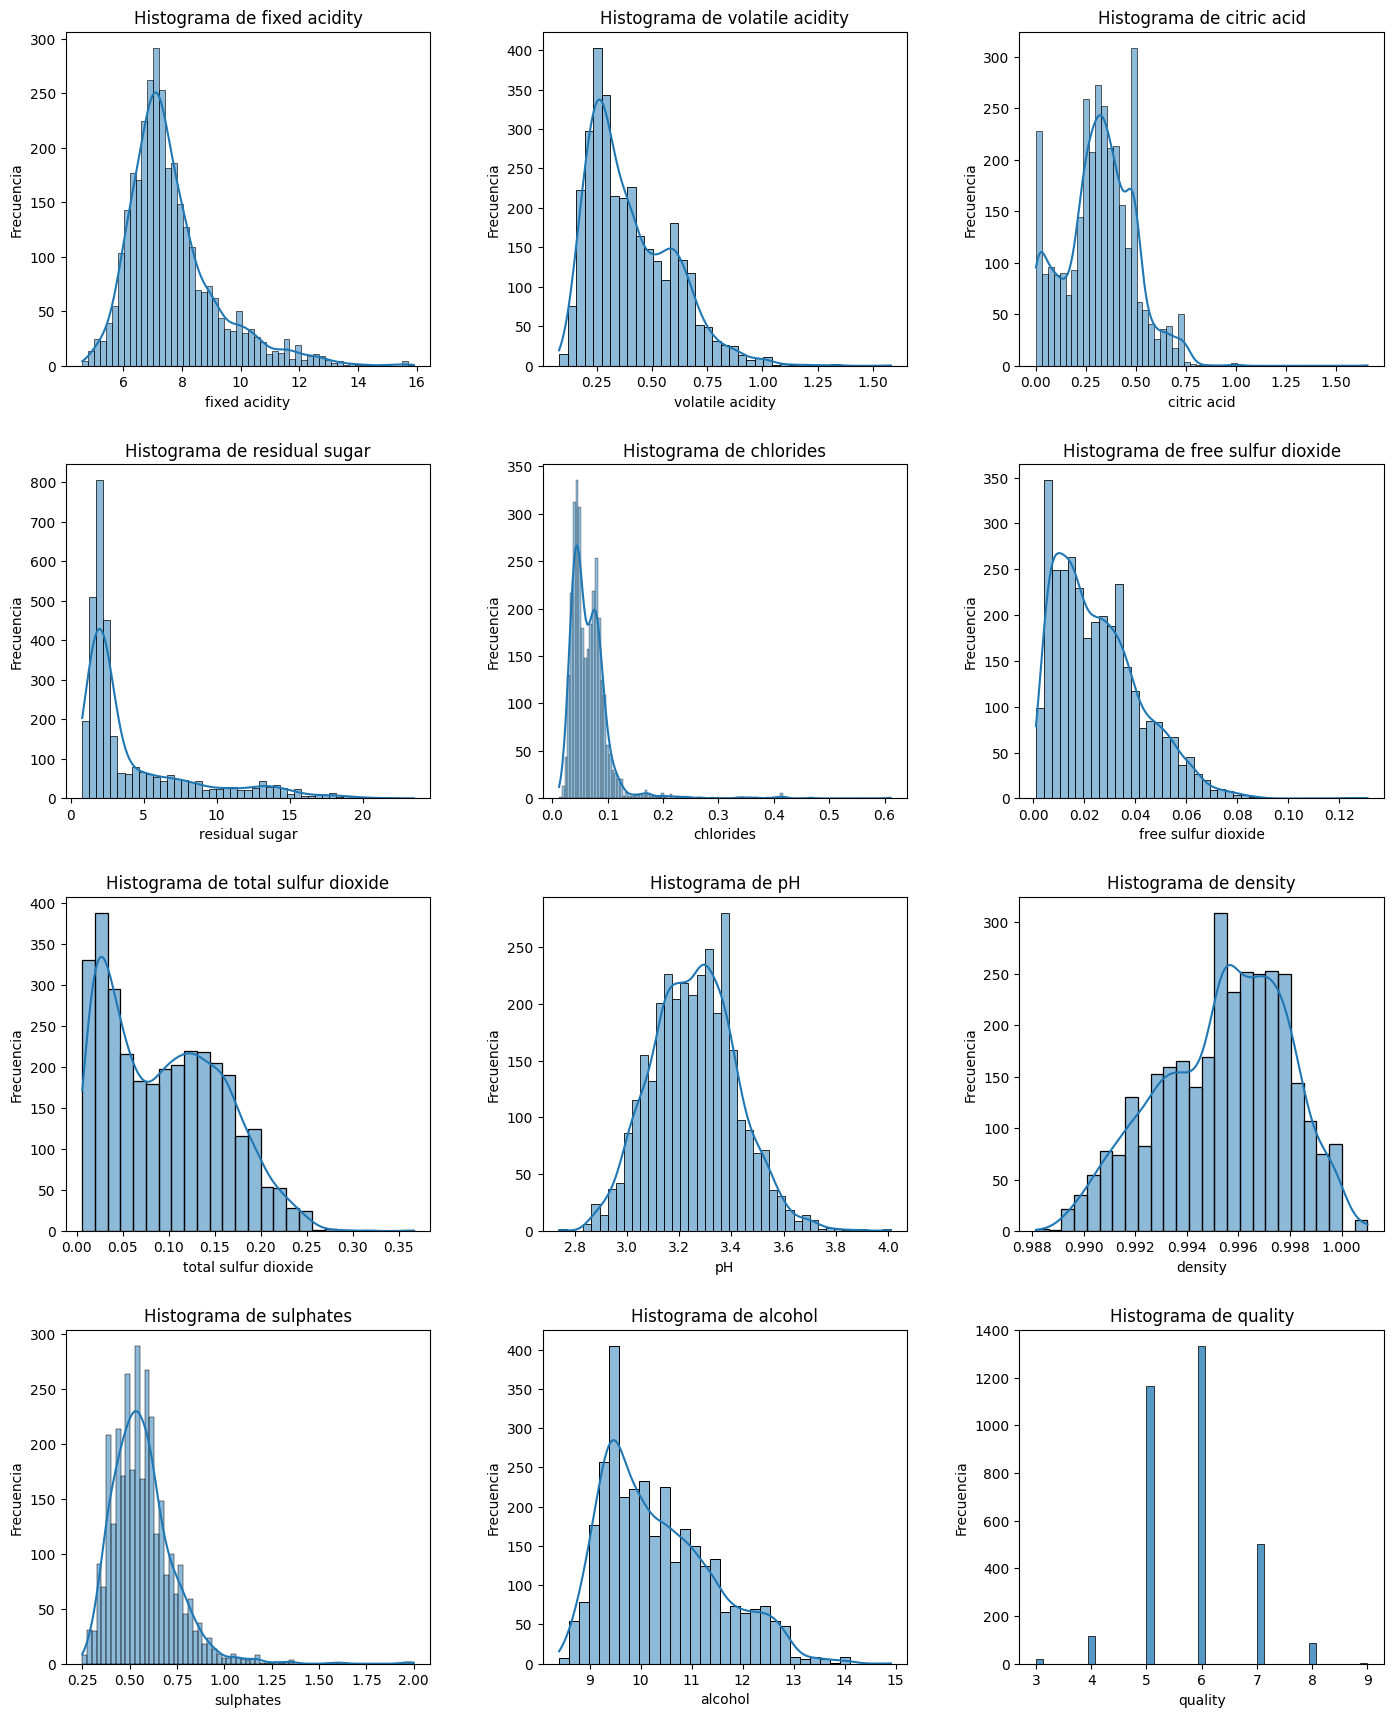

In [11]:
# Configuramos la cuadrícula de subgráficos
fig, axes = plt.subplots(4, 3, figsize=(15, 18))  # 4 filas y 3 columnas para 12 gráficos en total
fig.tight_layout(pad=5.0)  # Espacio entre gráficos

#Columnas y títulos
columns = [
    'fixed acidity', 'volatile acidity', 'citric acid', 
    'residual sugar', 'chlorides', 'free sulfur dioxide', 
    'total sulfur dioxide', 'pH', 'density', 
    'sulphates', 'alcohol', 'quality'
]
titles = [
    "Histograma de fixed acidity", "Histograma de volatile acidity", "Histograma de citric acid", 
    "Histograma de residual sugar", "Histograma de chlorides", "Histograma de free sulfur dioxide", 
    "Histograma de total sulfur dioxide", "Histograma de pH", "Histograma de density", 
    "Histograma de sulphates", "Histograma de alcohol", "Histograma de quality"
]

# Dibuja cada histograma en una subfigura
for i, (col, title) in enumerate(zip(columns, titles)):
    ax = axes[i // 3, i % 3]  # Selecciona el subgráfico en la cuadrícula
    if col == 'quality':
        sns.histplot(winesDf[col], kde=False, ax=ax)  # Sin kde para quality
    else:
        sns.histplot(winesDf[col], kde=True, ax=ax)
    ax.set_xlabel(col)
    ax.set_ylabel("Frecuencia")
    ax.set_title(title)

plt.show()


A partir de los histogramas generados, se observa que la mayoría de las variables presentan distribuciones aproximadamente unimodales, aunque no necesariamente normales. Algunas variables muestran asimetrías marcadas o colas más largas.

En general, no se identifican cantidades significativas de valores atípicos extremos, lo cual indica que la etapa de limpieza previa fue adecuada.

##### Matriz de correlacion

Como siguiente paso en la exploración visual, se construye una matriz de correlación. Esta herramienta permite evaluar la fuerza y dirección de las relaciones lineales entre pares de variables, y resulta especialmente útil para identificar patrones, dependencias, redundancias y posibles multicolinealidades.


A través de esta matriz buscamos detectar correlaciones altas que indiquen relaciones relevantes para el análisis posterior o que justifiquen examinar más profundamente ciertos grupos de variables.

In [12]:
# Generamos la matriz de correlacion, teniendo en cuenta unicamente valores numericos
numeric_data = winesDf.select_dtypes(include=[np.number])
#numeric_data = numeric_data.dropna()
correlation_matrix = numeric_data.corr()

correlation_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.126716,0.394672,-0.141115,0.259318,-0.320718,-0.368046,0.426108,-0.367687,0.308982,-0.004170,-0.017376
volatile acidity,0.126716,1.000000,-0.499696,-0.244183,0.358063,-0.395617,-0.471719,0.320972,0.284583,0.203200,-0.055407,-0.320769
citric acid,0.394672,-0.499696,1.000000,0.216785,0.007385,0.184881,0.247508,0.047059,-0.460677,0.040120,0.032792,0.152035
residual sugar,-0.141115,-0.244183,0.216785,1.000000,-0.175712,0.518635,0.562273,0.380135,-0.268701,-0.231172,-0.319939,-0.036492
chlorides,0.259318,0.358063,0.007385,-0.175712,1.000000,-0.233314,-0.328603,0.350057,-0.006688,0.458424,-0.176842,-0.191086
free sulfur dioxide,-0.320718,-0.395617,0.184881,0.518635,-0.233314,1.000000,0.781888,-0.054224,-0.175219,-0.263815,-0.209860,0.078706
total sulfur dioxide,-0.368046,-0.471719,0.247508,0.562273,-0.328603,0.781888,1.000000,-0.135114,-0.296255,-0.347544,-0.247720,0.017726
density,0.426108,0.320972,0.047059,0.380135,0.350057,-0.054224,-0.135114,1.000000,-0.012254,0.294760,-0.567200,-0.305091
pH,-0.367687,0.284583,-0.460677,-0.268701,-0.006688,-0.175219,-0.296255,-0.012254,1.000000,0.132974,0.195835,0.040946
sulphates,0.308982,0.203200,0.040120,-0.231172,0.458424,-0.263815,-0.347544,0.294760,0.132974,1.000000,0.072560,0.067959


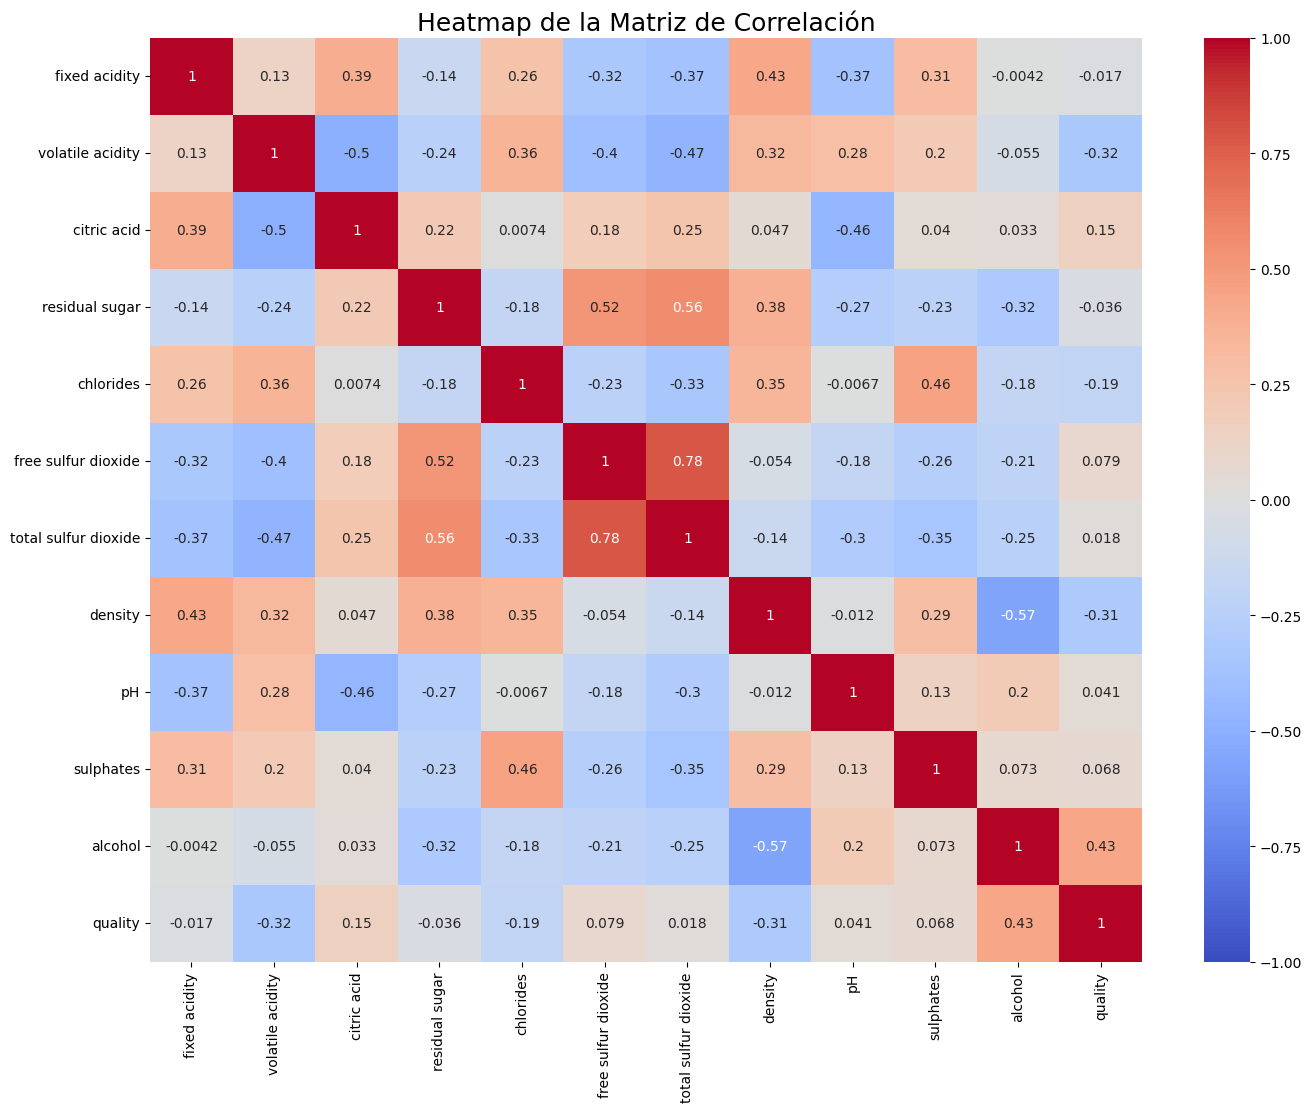

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
#imprimimos la matriz como un heatmap
plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix, vmin=-1.0, vmax=1.0, center=0.0, annot=True, cmap='coolwarm')
plt.title('Heatmap de la Matriz de Correlación', fontsize=18)
plt.show()

La matriz de correlación muestra que, en general, las variables no presentan relaciones lineales fuertes entre sí. La mayoría de los coeficientes se encuentran por debajo del umbral comúnmente considerado como alta correlación (aprox. ≥ 0.7)

La única correlación notablemente elevada aparece entre free sulfur dioxide y total sulfur dioxide, lo cual es coherente con el dominio del problema: el dióxido de azufre total está compuesto por la suma del dioxido de azufre libre y el dioxido de azufre que reacciono para formar otros compuestos.

Fuera de ese caso, no se observan correlaciones lineales lo suficientemente altas como para indicar redundancia de variables ni para extraer conclusiones directas sobre la calidad o el tipo de vino únicamente a partir de esta matriz.

##### Segmentación por niveles de calidad
Para facilitar el análisis y obtener interpretaciones más claras, se agrupa la variable quality en tres categorías: Baja, Media y Alta.

La segmentación se realiza de la siguiente manera:

0 a 4 → Baja

5 a 6 → Media

7 a 10 → Alta

In [15]:
# Crear una copia del DataFrame
winesDf_copy = winesDf.copy()

# Añadir la columna 'quality_group' en la copia
winesDf_copy['quality_group'] = pd.cut(winesDf_copy['quality'], 
                                       bins=[0, 5, 7, 10], 
                                       labels=['Baja', 'Media', 'Alta'])

# de 0 a 4 CALIDAD BAJA
# de 5 a 6 CALIDAD MEDIA
# de 7 a 10 CALIDAD ALTA

A continuación se visualiza cuántas observaciones pertenecen a cada uno de los tres grupos de calidad. Se observa que la mayoría de los vinos se concentran en las categorías Baja y Media, mientras que el grupo de Alta calidad está menos representado.

In [16]:
winesDf_copy['quality_group'].value_counts()

quality_group
Media    1836
Baja     1305
Alta       91
Name: count, dtype: int64

# Hipótesis <a id="hip"></a>

En esta sección se realiza un análisis orientado a evaluar las hipótesis planteadas inicialmente sobre la relación entre las características físico–químicas del vino, su tipo (Riesling o Garnacha) y su calidad.
Mientras que el análisis exploratorio anterior permitió identificar tendencias generales, aquí se aplican métodos estadísticos formales para determinar si las diferencias observadas entre los grupos de calidad son estadísticamente significativas.

### Hipótesis 1: <a id="hip1"></a>

#### La calidad de un vino es independiente del volumen alcohólico. Es decir, el contenido de alcohol sería un valor objetivo que no influye de manera relevante en la asignación de la calidad del vino.


##### Visualización inicial

Para analizar la hipótesis propuesta generamos un boxplot entre los quality_group y el alcohol para ver si a simple vista conseguimos ver alguna diferencia entre los conjuntos con respecto a la calidad

In [ ]:
sns.boxplot(x='quality_group', y='alcohol', data=winesDf_copy, notch=True)
plt.title('Comparación de alcohol entre calidad de vino')
plt.xlabel('Calidad')
plt.ylabel('alcohol')
plt.show()

A simple vista se ve que es posible ya que no pareciera que coincidan los "acogotamientos" y claramente pareciera haber una diferencia a simple vista, por lo que es de interes intentar realizar un test para corroborar si esta diferencia es significante o no


##### Test de normalidad (Shapiro-Wilk)

Primero evaluamos si los datos de alcohol dentro de cada grupo de calidad siguen una distribución normal:

In [ ]:
# Separamos los datos por los quality group utilizando la columna alcohol
vino_q_baja = winesDf_copy[winesDf_copy['quality_group'] == 'Baja']['alcohol']
vino_q_media = winesDf_copy[winesDf_copy['quality_group'] == 'Media']['alcohol']
vino_q_alta = winesDf_copy[winesDf_copy['quality_group'] == 'Alta']['alcohol']

# Test de Shapiro-Wilk para vinos de calidad baja:
stat, p = shapiro(vino_q_baja)
print(f"Test de Shapiro-Wilk para vinos Q baja: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para vinos de calidad media
stat, p = shapiro(vino_q_media)
print(f"Test de Shapiro-Wilk para vinos Q media: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para vinos de calidad alta
stat, p = shapiro(vino_q_alta)
print(f"Test de Shapiro-Wilk para vinos Q alta: Estadístico={stat:.3f}, p-valor={p:.3f}")   

Los tres grupos arrojaron p-valores inferiores a 0.05, por lo que se rechaza la normalidad en todos los casos.
Dado que no se cumple la normalidad, no es apropiado utilizar pruebas paramétricas como el test t.

Debemos utilizar un tipo de prueba no paramétrica

##### Test de homogeneidad de varianzas (Levene)

Para decidir qué prueba no paramétrica utilizar, evaluamos si las varianzas entre los grupos son iguales:

In [21]:
stat, p = stats.levene(vino_q_baja, vino_q_media)
print(f"Test de Levene para baja-media: Estadístico={stat:.3f}, p-valor={p:.3f}")

stat, p = stats.levene(vino_q_baja, vino_q_alta)
print(f"Test de Levene para baja-alta: Estadístico={stat:.3f}, p-valor={p:.3f}")

stat, p = stats.levene(vino_q_media, vino_q_alta)
print(f"Test de Levene para media-alta: Estadístico={stat:.3f}, p-valor={p:.3f}")



Test de Levene para baja-media: Estadístico=218.876, p-valor=0.000
Test de Levene para baja-alta: Estadístico=19.398, p-valor=0.000
Test de Levene para media-alta: Estadístico=0.521, p-valor=0.470


Resultado del test

Solo el par Media–Alta presenta homocedasticidad.
Los otros dos pares (Baja–Media y Baja–Alta) presentan varianzas distintas.

Esto determina qué prueba no paramétrica aplicar:

- Media–Alta: Mann-Whitney U

- Baja–Media: Kruskal-Wallis

- Baja–Alta: Kruskal-Wallis

In [ ]:
# Test de Mann-Whitney U para comparar Population_mln entre países desarrollados y en vías de desarrollo
stat, p = stats.mannwhitneyu(vino_q_media, vino_q_alta)
print(f"Test de Mann-Whitney U para Population_mln: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en los vinos de calidad media y alta.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en los vinos de calidad media y alta.")

print("-------------------------------------------------------------------------------")

# Test de Kruskal-Wallis para comparar el contenido de alcohol entre vinos calidad baja y media
stat, p = stats.kruskal(vino_q_baja, vino_q_media)
print(f"Test de Kruskal-Wallis para GDP_per_capita: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en los vinos de calidad media y alta.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en los vinos de calidad media y alta.")

print("-------------------------------------------------------------------------------")

# Test de Kruskal-Wallis para comparar el contenido de alcohol entre vinos calidad baja y alta
stat, p = stats.kruskal(vino_q_baja, vino_q_alta)
print(f"Test de Kruskal-Wallis para GDP_per_capita: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en los vinos de calidad media y alta.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en los vinos de calidad media y alta.")

#### CONCLUSIÓN:

#### Los resultados de todas las pruebas no paramétricas muestran diferencias significativas entre los grupos de calidad en relación con el contenido de alcohol.

#### Esto nos permite rechazar la hipótesis que afirmaba que la calidad del vino es independiente del nivel de alcohol.

#### En consecuencia, podemos afirmar que:

#### Los vinos con mayor contenido de alcohol tienden a pertenecer a grupos de calidad más alta, lo cual coincide con la tendencia observada previamente en el boxplot.



### Hipótesis 2: Relación entre variables <a id="hip2"></a>

#### Los factores que caracterizan a un vino deberian diferir en dependencia del tipo de vino.
Es decir, esperamos que algunas variables como la acidez, el azúcar residual, el pH, los sulfatos, el alcohol, entre otras presenten comportamientos distintos entre los distintos tipos de vino.


##### Regresión Logística
Aplicamos un modelo de regresión logística con el objetivo de evaluar qué tan bien pueden las variables predecir el tipo de vino.

En este caso, trabajamos con la variable objetivo type, codificada de la siguiente manera:

- 1 → Riesling (vino blanco)

- 0 → Garnacha (vino tinto)


Dividimos los datos en particiones para entrenamiento y test.

Hacemos la estandarización de los datos para evitar que las diferencias de rango de las distintas variables puedan afectar a los pesos que ajusta el modelo.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

print(winesDf_copy['type'].value_counts())

# Variables predictoras y variable objetivo
X1 = winesDf_copy[['volatile acidity','citric acid','residual sugar', 'fixed acidity', 'pH','chlorides','free sulfur dioxide','total sulfur dioxide', 'alcohol', 'sulphates','density']]  # características importantes
y1 = winesDf_copy['type']


# Inicializar el codificador
label_encoder = LabelEncoder()

# Convertir 'type' (Garnacha y Riesling) a etiquetas 0 y 1
y1 = label_encoder.fit_transform(winesDf_copy['type'])

# Mostrar los valores codificados
print(y1)

# Dividir el dataset en conjuntos de entrenamiento y prueba
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, stratify=y1, random_state=10)


print(f"Tamaño del conjunto de entrenamiento: {X1_train.shape[0]} muestras")
print(f"Tamaño del conjunto de prueba: {X1_test.shape[0]} muestras")

# Ajustar StandardScaler sobre X_train
scaler = StandardScaler()
scaler.fit(X1_train)

# Estandarizar X_train y X_test usando el scaler ajustado
X1_train_stand = scaler.transform(X1_train)
X1_test_stand = scaler.transform(X1_test)


type
Riesling    1633
Garnacha    1599
Name: count, dtype: int64
[1 1 1 ... 0 0 0]
Tamaño del conjunto de entrenamiento: 2262 muestras
Tamaño del conjunto de prueba: 970 muestras


Entrenamos el modelo 

In [ ]:
from sklearn.linear_model import LogisticRegression

# Crear un modelo de regresión logística
logistic_model1 = LogisticRegression(penalty=None, random_state=10)

# Entrenar el modelo con los datos de entrenamiento estandarizados
logistic_model1.fit(X1_train_stand, y1_train)

Usamos cross validation como método de evaluación. Cuando lo llamamos, corre cross validation según el número de folds indicados, y nos reporta la performance obtenida en cada subconjunto. Después, nosotros podemos calcular el promedio de ese rendimiento (y el desvío), y podemos usar esa medida como representativa de la performance que obtenemos entrenando el modelo sobre todo el conjunto de entrenamiento.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Crear un modelo de Regresión Logística baseline
baseline_logistic_model = LogisticRegression(penalty=None, random_state=10)

# Realizar la validación cruzada y calcular la precisión
cv_scores = cross_val_score(baseline_logistic_model, X1_train_stand, y1_train, cv=5, scoring='accuracy')

# Imprimir los resultados de la validación cruzada
print("Exactitud en cada fold:", cv_scores)
print("Exactitud promedio:", cv_scores.mean())
print("Desvío de la Exactitud:", cv_scores.std())

# Dejamos el modelo entrenado al final
baseline_logistic_model.fit(X1_train_stand, y1_train)

Ajustemos hiperparámetros usando GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir los valores de alpha que queremos probar
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Crear un modelo de Regresión Logística
logistic_model1 = LogisticRegression(penalty='l2', max_iter=1000, random_state=10)

# Crear un objeto GridSearchCV
grid_search = GridSearchCV(logistic_model1, param_grid, cv=5, scoring='accuracy')

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X1_train_stand, y1_train)

# Imprimir los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)
# Imprimir la mejor exactitud encontrada
print("Mejor exactitud:", grid_search.best_score_)

In [ ]:
# Obtener el mejor modelo
best_logistic_model = grid_search.best_estimator_

In [ ]:
columnas = [ 'fixed acidity', 'volatile acidity', 'citric acid','residual sugar', 'chlorides', 'free sulfur dioxide','total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

# Recuperamos los coeficientes del modelo logístico
best_theta_logistic = best_logistic_model.coef_

# Graficamos los coeficientes del modelo logístico
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(np.arange(0, best_theta_logistic.size), np.squeeze(best_theta_logistic))
labels = columnas
ax.set_xticks(np.arange(0, best_theta_logistic.size))
ax.set_xticklabels(labels=labels, rotation=90)
ax.set_title('Pesos aprendidos por el regresor logístico (con regularización)')
plt.show()

Por último, comparamos el rendimiento de los dos modelos (el baseline y el best model obtenido mediante grid_search) sobre los datos de test, usando tanto accuracy como una matriz de confusión.

In [ ]:
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

target_names = ['garnacha', 'riesling']

# Predecir con el modelo original en X_test_stand
y1_pred_original = baseline_logistic_model.predict(X1_test_stand)

# Calcular la exactitud y la matriz de confusión del modelo original
accuracy_original = accuracy_score(y1_test, y1_pred_original)
confusion_matrix_original = confusion_matrix(y1_test, y1_pred_original)
sns.heatmap(confusion_matrix_original, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicho')
plt.ylabel('GT')
plt.title('Matriz confusión (modelo sin regularizar)')
plt.show()

# Predecir con el mejor modelo regularizado en X_test_stand
y1_pred_best = best_logistic_model.predict(X1_test_stand)

# Calcula la exactitud y la matriz de confusión del mejor modelo regularizado  
accuracy_best = accuracy_score(y1_test, y1_pred_best)
confusion_matrix_best = confusion_matrix(y1_test, y1_pred_best)
sns.heatmap(confusion_matrix_best, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicho')
plt.ylabel('GT')
plt.title('Matriz confusión (modelo regularizado)')
plt.show()


print("Exactitud del modelo original:", accuracy_original)
print("Exactitud del mejor modelo regularizado:", accuracy_best)

In [ ]:
from sklearn.metrics import classification_report

# Genera un informe de clasificación
print(classification_report(y1_test, y1_pred_best))

Coeficientes del modelo:

Los coeficientes de la regresión logística indican la importancia relativa de cada característica en la predicción. Si un coeficiente es muy grande o pequeño, significa que esa característica tiene una influencia considerable sobre la probabilidad de que un vino pertenezca a una clase determinada.

Si el coeficiente de una característica es positivo, significa que a medida que aumenta el valor de esa característica, la probabilidad de que el vino pertenezca a la clase predicha también aumenta.


Si el coeficiente es negativo, significa que a medida que esa característica aumenta, la probabilidad de que el vino pertenezca a la clase predicha disminuye.

In [ ]:
# Mostrar los coeficientes del modelo
coef = best_logistic_model.coef_[0]
feature_names = X1_train.columns  
coef_df = pd.DataFrame(coef, index=feature_names, columns=['Coeficiente'])
coef_df = coef_df.sort_values(by='Coeficiente', ascending=False)  # Ordena por valor absoluto
print(coef_df)

Para interpretar los coeficientes, los convertimos en odds ratios, que son más fáciles de interpretar.

Los odds ratios representan el cambio en las probabilidades de pertenecer a una clase por cada unidad de cambio en la característica.

Un odds ratio mayor que 1 indica que la característica aumenta las probabilidades de la clase, mientras que un odds ratio menor que 1 indica que las probabilidades disminuyen.

In [ ]:
# Calcular los odds ratios
odds_ratios = np.exp(coef)
odds_ratios_df = pd.DataFrame(odds_ratios, index=feature_names, columns=['Odds Ratio'])
odds_ratios_df = odds_ratios_df.sort_values(by='Odds Ratio', ascending=False)
print(odds_ratios_df)

ANALISIS DE LOS RESULTADOS OBTENIDOS:

-------------------------------------------------------------------------------------------------------------------------------------------------

total sulfur dioxide: Un coeficiente positivo (2.85) significa que un aumento en el dióxido de azufre total aumenta la probabilidad de que el vino sea Riesling (1).

residual sugar: Un coeficiente positivo (1.53) sugiere que a mayor cantidad de azúcar residual, hay más probabilidad de que el vino sea Riesling.

citric acid: Un coeficiente positivo (0.23) sugiere que el aumento en el ácido cítrico aumenta la probabilidad de que el vino sea Riesling.

alcohol: Un coeficiente negativo (-1.51) significa que a mayor cantidad de alcohol, disminuye la probabilidad de que el vino sea Riesling, es decir, la presencia de alcohol más alto favorece a Garnacha.

density: Un coeficiente muy negativo (-2.80) significa que a mayor densidad, disminuye la probabilidad de que el vino sea Riesling.

-------------------------------------------------------------------------------------------------------------------------------------------------

total sulfur dioxide (17.29): Aumentar el dióxido de azufre total en una unidad hace que la probabilidad de que el vino sea Riesling sea 17.29 veces mayor.

residual sugar (4.60): Aumentar el azúcar residual hace que la probabilidad de que el vino sea Riesling sea 4.6 veces mayor.

citric acid (1.25): Un aumento en el ácido cítrico hace que la probabilidad de que el vino sea Riesling sea 1.25 veces mayor.

alcohol (0.22): A mayor alcohol, la probabilidad de que el vino sea Riesling disminuye considerablemente, ya que el odds ratio es menor que 1.

density (0.06): A mayor densidad, la probabilidad de que el vino sea Riesling disminuye aún más, dado que el odds ratio es muy pequeño.

-------------------------------------------------------------------------------------------------------------------------------------------------



A partir de los resultados obtenidos planteamos las siguiente hipótesis:

hipótesis 2.1: Las variables total sulfur dioxide, residual sugar, y citric acid aumentan la probabilidad de que el vino sea Riesling.

hipótesis 2.2: Mientras que las variables alcohol y density favorecen la clasificación de Garnacha. 

Esto te permite comprender qué variables son más importantes para clasificar el vino, y cómo su presencia o ausencia afecta la predicción de la clase.

-------------------------------------------------------------------------------------------------------------------------------------------------

Seguimos analizando las variables para verificar las hipótesis

Miramos los boxplots de las variables (que consideramos mas importantes) con respecto al tipo 

In [ ]:
# Creamos los boxplots para comparar por cada variable en ambos tipos de vino

# Variable: total sulfur dioxide
sns.boxplot(x='type', y='total sulfur dioxide', data=winesDf_copy)
plt.title('Comparación de total sulfur dioxide entre Vinos Tintos (Garnacha) y Blancos (Riesling)')
plt.xlabel('Tipo de Vino')
plt.ylabel('total sulfure dioxide')
plt.show()

# Variable: residual sugar
sns.boxplot(x='type', y='residual sugar', data=winesDf_copy)
plt.title('Comparación de Residual Sugar entre Vinos Tintos (Garnacha) y Blancos (Riesling)')
plt.xlabel('Tipo de Vino')
plt.ylabel('Residual Sugar')
plt.show()

# Variable: citric acid
sns.boxplot(x='type', y='citric acid', data=winesDf_copy)
plt.title('Comparación de Residual Sugar entre Vinos Tintos (Garnacha) y Blancos (Riesling)')
plt.xlabel('Tipo de Vino')
plt.ylabel('citric acid')
plt.show()

# Variable: alcohol
sns.boxplot(x='type', y='alcohol', data=winesDf_copy)
plt.title('Comparación de alcohol entre Vinos Tintos (Garnacha) y Blancos (Riesling)')
plt.xlabel('Tipo de Vino')
plt.ylabel('alcohol')
plt.show()

# Variable: density
sns.boxplot(x='type', y='density', data=winesDf_copy)
plt.title('Comparación de density entre Vinos Tintos (Garnacha) y Blancos (Riesling)')
plt.xlabel('Tipo de Vino')
plt.ylabel('density')
plt.show()

Probamos por tests parametricos para validar las hipótesis

Probamos normalidad mediante el test de Shapiro-Wilk, para ver si podemos usar Test-T

In [ ]:
# Separamos los datos en dos grupos,garnacha y riesling

tintos = winesDf_copy[winesDf_copy['type'] == 'Garnacha']['total sulfur dioxide']
blancos = winesDf_copy[winesDf_copy['type'] == 'Riesling']['total sulfur dioxide']

# Test de Shapiro-Wilk para tintos
stat, p = shapiro(tintos)
print(f"Test de Shapiro-Wilk para vinos Q baja: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para blancos
stat, p = shapiro(blancos)
print(f"Test de Shapiro-Wilk para vinos Q media: Estadístico={stat:.3f}, p-valor={p:.3f}")

Vimos que el P-valor nos dio menor a 0.05 por ende no tenemos normalidad.

Probamos homocedasticidad (por las dudas?)

In [ ]:
stat, p = stats.levene(tintos, blancos)
print(f"Test de Levene para baja-media: Estadístico={stat:.3f}, p-valor={p:.3f}")


No tenemos normalidad ni homocedasticidad. Por lo tanto no podemos usar test-t.

Utilizamos el test Kruskal-wallis 

In [ ]:
# Test de Kruskal-Wallis para comparar el total sulfur dioxide entre vinos garnacha y riesling
stat, p = stats.kruskal(tintos, blancos)
print(f"Test de Kruskal-Wallis para GDP_per_capita: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en el total sulfur dioxide entre vinos riesling y garnacha.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en el tota sulfur dioxide entre vinos riesling y garnacha.")

Para el caso del alcohol, podemos observar en el boxplot que pareciera no haber diferencias entre los tipos, aun asi probamos mediante los test



Probamos normalidad mediante Shapiro-Wilk

In [ ]:
# Separamos los datos en dos grupos,garnacha y riesling, y comparamos por la variable alcohol

tintosALC = winesDf_copy[winesDf_copy['type'] == 'Garnacha']['alcohol']
blancosALC = winesDf_copy[winesDf_copy['type'] == 'Riesling']['alcohol']

# Test de Shapiro-Wilk para tintos
stat, p = shapiro(tintosALC)
print(f"Test de Shapiro-Wilk para vinos Q baja: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para blancos
stat, p = shapiro(blancosALC)
print(f"Test de Shapiro-Wilk para vinos Q media: Estadístico={stat:.3f}, p-valor={p:.3f}")

In [ ]:
stat, p = stats.levene(tintosALC, blancosALC)
print(f"Test de Levene para baja-media: Estadístico={stat:.3f}, p-valor={p:.3f}")

Como no nos dio homocedasticidad, probamos con el Test de Kruskal-Wallis

In [ ]:
# Test de Kruskal-Wallis para comparar el alcohol entre vinos garnacha y riesling
stat, p = stats.kruskal(tintosALC, blancosALC)
print(f"Test de Kruskal-Wallis para GDP_per_capita: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en el contenido de alcohol entre vinos riesling y garnacha.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en el contenido de alcohol entre vinos riesling y garnacha.")

#### CONCLUSION:

##### Por lo tanto, obtuvimos evidencia para confirmar que las hipótesis se cumplen.

##### Logramos obtener variables e identificar cuales son más importantes para clasificar el vino, y cómo su presencia o ausencia afecta la predicción.

### Hipótesis 3: <a id="hip3"></a>

El ácido cítrico no impacta en la calidad del vino de la misma manera para los distintos tipos

##### Distribución ácido cítrico entre las calidades del vino, diferenciando por tipo de vino

In [ ]:
# Boxplot para comparar la distribución de ácido cítrico entre las distintas calidades en vinos Garnacha
winesDf_copyGarnacha = winesDf_copy[winesDf_copy['type'] == 'Garnacha']

sns.boxplot(x='quality_group', y='citric acid', data=winesDf_copyGarnacha, notch=True)
plt.title('Comparación de ácido cítrico entre calidad de vino Garnacha')
plt.xlabel('Calidad')
plt.ylabel('Ácido cítrico')
plt.show()

vino_baja_g = winesDf_copyGarnacha[winesDf_copyGarnacha['quality_group'] == 'Baja']['citric acid']
vino_media_g = winesDf_copyGarnacha[winesDf_copyGarnacha['quality_group'] == 'Media']['citric acid']
vino_alta_g = winesDf_copyGarnacha[winesDf_copyGarnacha['quality_group'] == 'Alta']['citric acid']

print(vino_baja_g.mean())
print(vino_media_g.mean())
print(vino_alta_g.mean())

In [ ]:
# Boxplot para comparar la distribución de ácido cítrico entre las distintas calidades en vinos Riesling
winesDf_copyRiesling = winesDf_copy[winesDf_copy['type'] == 'Riesling']

sns.boxplot(x='quality_group', y='citric acid', data=winesDf_copyRiesling, notch=True)
plt.title('Comparación de ácido cítrico entre calidad de vino Riesling')
plt.xlabel('Calidad')
plt.ylabel('Ácido cítrico')
plt.ylim(0,1)
plt.show()

vino_baja_r = winesDf_copyRiesling[winesDf_copyRiesling['quality_group'] == 'Baja']['citric acid']
vino_media_r = winesDf_copyRiesling[winesDf_copyRiesling['quality_group'] == 'Media']['citric acid']
vino_alta_r = winesDf_copyRiesling[winesDf_copyRiesling['quality_group'] == 'Alta']['citric acid']

print(vino_baja_r.mean())
print(vino_media_r.mean())
print(vino_alta_r.mean())

#### Vinos Garnacha

##### Analizamos normalidad de los datos

In [ ]:
# Separamos los datos en tres grupos, calidad baja, media y alta
vino_baja_g = winesDf_copyGarnacha[winesDf_copyGarnacha['quality_group'] == 'Baja']['citric acid']
vino_media_g = winesDf_copyGarnacha[winesDf_copyGarnacha['quality_group'] == 'Media']['citric acid']
vino_alta_g = winesDf_copyGarnacha[winesDf_copyGarnacha['quality_group'] == 'Alta']['citric acid']

# Test de Shapiro-Wilk para vinos Garnacha de calidad baja
stat, p = shapiro(vino_baja_g)
print(f"Test de Shapiro-Wilk para vinos Garnacha Q baja: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para vinos Garnacha de calidad media
stat, p = shapiro(vino_media_g)
print(f"Test de Shapiro-Wilk para vinos Garnacha Q media: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para vinos Garnacha de calidad alta
stat, p = shapiro(vino_alta_g)
print(f"Test de Shapiro-Wilk para vinos Garnacha Q alta: Estadístico={stat:.3f}, p-valor={p:.3f}")

In [ ]:
# Test de Kolmogorov-Smirnov vinos Garnacha de calidad alta
stat, p = kstest(vino_alta_g, 'norm')
print(f"Test de Kolmogorov-Smirnov para vinos Garnacha alta: Estadístico={stat:.3f}, p-valor={p:.3f}")

##### Concluimos que no hay normalidad en los datos

##### Analizamos homocedasticidad

In [ ]:
stat, p = stats.levene(vino_baja_g, vino_media_g)
print(f"Test de Levene para Garnacha baja-media: Estadístico={stat:.3f}, p-valor={p:.3f}")

stat, p = stats.levene(vino_baja_g, vino_alta_g)
print(f"Test de Levene para Garnacha baja-alta: Estadístico={stat:.3f}, p-valor={p:.3f}")

stat, p = stats.levene(vino_media_g, vino_alta_g)
print(f"Test de Levene para Garnacha media-alta: Estadístico={stat:.3f}, p-valor={p:.3f}")

##### Hay homocedasticidad : baja-media

##### No hay homocedasticidad : baja-alta y media-alta

In [ ]:
# Test de Kruskal-Wallis para comparar ácido cítrico entre calidad baja y media de vinos Garnacha
stat, p = stats.kruskal(vino_baja_g, vino_media_g)
print(f"Test de Kruskal-Wallis para acido cítrico entre calidades de vino Garnacha: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en el ácido cítrico entre los vinos de calidad baja y media.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en el ácido cítrico entre los vinos de calidad baja y media.")

In [ ]:
# Test de Mann-Whitney U para comparar ácido cítrico entre calidad baja y alta de vinos Garnacha
stat, p = stats.mannwhitneyu(vino_baja_g, vino_alta_g)
print(f"Test de Mann-Whitney U para ácido cítrico entre calidades de vino Garnacha: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en el ácido cítrico entre los vinos de calidad baja y alta.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en el ácido cítrico entre los vinos de calidad baja y alta.")


# Test de Mann-Whitney U para comparar ácido cítrico entre calidad media y alta de vinos Garnacha
stat, p = stats.mannwhitneyu(vino_media_g, vino_alta_g)
print(f"Test de Mann-Whitney U para ácido cítrico entre calidades de vino Garnacha: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en el ácido cítrico entre los vinos de calidad media y alta.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en el ácido cítrico entre los vinos de calidad media y alta.")

#### Vinos Riesling

##### Analizamos normalidad de los datos

In [ ]:
# Separamos los datos en tres grupos, calidad baja, media y alta
vino_baja_r = winesDf_copyRiesling[winesDf_copyRiesling['quality_group'] == 'Baja']['citric acid']
vino_media_r = winesDf_copyRiesling[winesDf_copyRiesling['quality_group'] == 'Media']['citric acid']
vino_alta_r = winesDf_copyRiesling[winesDf_copyRiesling['quality_group'] == 'Alta']['citric acid']

# Test de Shapiro-Wilk para vinos Garnacha de calidad baja
stat, p = shapiro(vino_baja_r)
print(f"Test de Shapiro-Wilk para vinos Riesling Q baja: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para vinos Garnacha de calidad media
stat, p = shapiro(vino_media_r)
print(f"Test de Shapiro-Wilk para vinos Riesling Q media: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para vinos Garnacha de calidad alta
stat, p = shapiro(vino_alta_r)
print(f"Test de Shapiro-Wilk para vinos Riesling Q alta: Estadístico={stat:.3f}, p-valor={p:.3f}")

##### Concluimos no hay normalidad en los datos

##### Analizamos homocedasticidad

In [ ]:
stat, p = stats.levene(vino_baja_r, vino_media_r)
print(f"Test de Levene para Riesling baja-media: Estadístico={stat:.3f}, p-valor={p:.3f}")

stat, p = stats.levene(vino_baja_r, vino_alta_r)
print(f"Test de Levene para Riesling baja-alta: Estadístico={stat:.3f}, p-valor={p:.3f}")

stat, p = stats.levene(vino_media_r, vino_alta_r)
print(f"Test de Levene para Riesling media-alta: Estadístico={stat:.3f}, p-valor={p:.3f}")

##### Obtuvimos un p-valor menor a 0.05, por ende tenemos datos que no son homocedasticos!

In [ ]:
# Test de Kruskal-Wallis para comparar para comparar ácido cítrico entre calidad baja y alta de vinos Riesling
stat, p = stats.kruskal(vino_baja_r, vino_alta_r)
print(f"Test de Kruskal-Wallis para acido cítrico entre calidades de vino Riesling: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en los vinos de calidad baja y media.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en los vinos de calidad baja y media.")
print("---------------------------------------------------------------------------------------------")

stat, p = stats.kruskal(vino_baja_r, vino_alta_r)
print(f"Test de Kruskal-Wallis para acido cítrico entre calidades de vino Riesling: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en los vinos de calidad baja y alta.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en los vinos de calidad baja y alta.")
print("---------------------------------------------------------------------------------------------")

stat, p = stats.kruskal(vino_media_r, vino_alta_r)
print(f"Test de Kruskal-Wallis para acido cítrico entre calidades de vino Riesling: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en los vinos de calidad media y alta.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en los vinos de calidad media y alta.")
print("---------------------------------------------------------------------------------------------")

CONCLUSIÓN: Logramos obtener evidencia para confirmar nuestra hipótesis, es decir, como observamos en el boxplot se cumple que en los vinos garnacha un mayor contenido de citric acid influye para tener una calidad alta. Mientras que en los vinos Riesling no varia el citric acid con respecto a la calidad.

### Hipótesis 4: <a id="hip4"></a>

El ácido volátil no impacta en la calidad del vino de la misma manera para los distintos tipos

##### Distribución ácido volátil entre las calidades del vino, diferenciando por tipo de vino

In [ ]:
# Boxplot para comparar la distribución de ácido volatil entre las distintas calidades en vinos Garnacha
winesDf_copyGarnacha = winesDf_copy[winesDf_copy['type'] == 'Garnacha']


sns.boxplot(x='quality_group', y='volatile acidity', data=winesDf_copyGarnacha, notch=True)
plt.title('Comparación de ácido volátil entre calidad de vino Garnacha')
plt.xlabel('Calidad')
plt.ylabel('Ácido volátil')
plt.ylim(0,1.1)
plt.show()

vino_baja_g = winesDf_copyGarnacha[winesDf_copyGarnacha['quality_group'] == 'Baja']['volatile acidity']
vino_media_g = winesDf_copyGarnacha[winesDf_copyGarnacha['quality_group'] == 'Media']['volatile acidity']
vino_alta_g = winesDf_copyGarnacha[winesDf_copyGarnacha['quality_group'] == 'Alta']['volatile acidity']

print(vino_baja_g.mean())
print(vino_media_g.mean())
print(vino_alta_g.mean())

In [ ]:
# Boxplot para comparar la distribución de ácido volátil entre las distintas calidades en vinos Riesling
winesDf_copyRiesling = winesDf_copy[winesDf_copy['type'] == 'Riesling']


sns.boxplot(x='quality_group', y='volatile acidity', data=winesDf_copyRiesling, notch=True)
plt.title('Comparación de ácido volátil entre calidad de vino Riesling')
plt.xlabel('Calidad')
plt.ylabel('Ácido volátil')
plt.ylim(0,0.7)
plt.show()

vino_baja_r = winesDf_copyRiesling[winesDf_copyRiesling['quality_group'] == 'Baja']['volatile acidity']
vino_media_r = winesDf_copyRiesling[winesDf_copyRiesling['quality_group'] == 'Media']['volatile acidity']
vino_alta_r = winesDf_copyRiesling[winesDf_copyRiesling['quality_group'] == 'Alta']['volatile acidity']

print(vino_baja_r.mean())
print(vino_media_r.mean())
print(vino_alta_r.mean())

#### Vinos Garnacha

##### Analizamos normalidad de los datos

In [ ]:
# Separamos los datos en tres grupos, calidad baja, media y alta
vino_baja_g = winesDf_copyGarnacha[winesDf_copyGarnacha['quality_group'] == 'Baja']['volatile acidity']
vino_media_g = winesDf_copyGarnacha[winesDf_copyGarnacha['quality_group'] == 'Media']['volatile acidity']
vino_alta_g = winesDf_copyGarnacha[winesDf_copyGarnacha['quality_group'] == 'Alta']['volatile acidity']

# Test de Shapiro-Wilk para vinos Garnacha de calidad baja
stat, p = shapiro(vino_baja_g)
print(f"Test de Shapiro-Wilk para vinos Garnacha Q baja: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para vinos Garnacha de calidad media
stat, p = shapiro(vino_media_g)
print(f"Test de Shapiro-Wilk para vinos Garnacha Q media: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para vinos Garnacha de calidad alta
stat, p = shapiro(vino_alta_g)
print(f"Test de Shapiro-Wilk para vinos Garnacha Q alta: Estadístico={stat:.3f}, p-valor={p:.3f}")

##### Concluimos que no hay normalidad en los datos

##### Analizamos homocedasticidad

In [ ]:
stat, p = stats.levene(vino_baja_g, vino_media_g)
print(f"Test de Levene para Garnacha baja-media: Estadístico={stat:.3f}, p-valor={p:.3f}")

stat, p = stats.levene(vino_baja_g, vino_alta_g)
print(f"Test de Levene para Garnacha baja-alta: Estadístico={stat:.3f}, p-valor={p:.3f}")

stat, p = stats.levene(vino_media_g, vino_alta_g)
print(f"Test de Levene para Garnacha media-alta: Estadístico={stat:.3f}, p-valor={p:.3f}")

##### Hay homoceidad : baja-media, baja-alta y media-alta

In [ ]:
# Test de Mann-Whitney U para comparar ácido volátil entre calidad baja y media de vinos Garnacha
stat, p = stats.mannwhitneyu(vino_baja_g, vino_media_g)
print(f"Test de Mann-Whitney U para ácido volátil entre calidades de vino Garnacha: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en el  ácido volátil entre los vinos de calidad baja y media.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en el  ácido volátil entre los vinos de calidad baja y media.")

# Test de Mann-Whitney U para comparar ácido volátil entre calidad baja y alta de vinos Garnacha
stat, p = stats.mannwhitneyu(vino_baja_g, vino_alta_g)
print(f"Test de Mann-Whitney U para ácido volátil entre calidades de vino Garnacha: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en el  ácido volátil entre los vinos de calidad baja y alta.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en el  ácido volátil entre los vinos de calidad baja y alta.")


# Test de Mann-Whitney U para comparar ácido volátil entre calidad media y alta de vinos Garnacha
stat, p = stats.mannwhitneyu(vino_media_g, vino_alta_g)
print(f"Test de Mann-Whitney U para ácido volátil entre calidades de vino Garnacha: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en el  ácido volátil entre los vinos de calidad media y alta.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en el  ácido volátil entre los vinos de calidad media y alta.")

### En los vinos Garnacha encontramos suficiente evidencia para decir que la cantidad de ácido volátil es inversamente proporcional a la calidad del vino.

#### Vinos Riesling

##### Analizamos normalidad de los datos

In [ ]:
# Separamos los datos en tres grupos, calidad baja, media y alta
vino_baja_r = winesDf_copyRiesling[winesDf_copyRiesling['quality_group'] == 'Baja']['volatile acidity']
vino_media_r = winesDf_copyRiesling[winesDf_copyRiesling['quality_group'] == 'Media']['volatile acidity']
vino_alta_r = winesDf_copyRiesling[winesDf_copyRiesling['quality_group'] == 'Alta']['volatile acidity']

# Test de Shapiro-Wilk para vinos Garnacha de calidad baja
stat, p = shapiro(vino_baja_r)
print(f"Test de Shapiro-Wilk para vinos Riesling Q baja: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para vinos Garnacha de calidad media
stat, p = shapiro(vino_media_r)
print(f"Test de Shapiro-Wilk para vinos Riesling Q media: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para vinos Garnacha de calidad alta
stat, p = shapiro(vino_alta_r)
print(f"Test de Shapiro-Wilk para vinos Riesling Q alta: Estadístico={stat:.3f}, p-valor={p:.3f}")

##### Concluimos que no hay normalidad en los datos

##### Analizamos homocedasticidad

In [ ]:
stat, p = stats.levene(vino_baja_r, vino_media_r)
print(f"Test de Levene para Riesling baja-media: Estadístico={stat:.3f}, p-valor={p:.3f}")

stat, p = stats.levene(vino_baja_r, vino_alta_r)
print(f"Test de Levene para Riesling baja-alta: Estadístico={stat:.3f}, p-valor={p:.3f}")

stat, p = stats.levene(vino_media_r, vino_alta_r)
print(f"Test de Levene para Riesling media-alta: Estadístico={stat:.3f}, p-valor={p:.3f}")

##### Hay homoceidad : baja-alta, media-alta

##### No hay homoceidad : baja-media

In [ ]:
# Test de Kruskal-Wallis para comparar para comparar ácido volátil entre calidad baja y media de vinos Riesling
stat, p = stats.kruskal(vino_baja_r, vino_media_r)
print(f"Test de Kruskal-Wallis para ácido volátil entre calidades de vino Riesling: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en los vinos de calidad baja y media.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en los vinos de calidad baja y media.")

In [ ]:
# Test de Mann-Whitney U para comparar ácido volátil entre calidad baja y alta de vinos Riesling
stat, p = stats.mannwhitneyu(vino_baja_r, vino_alta_r)
print(f"Test de Mann-Whitney U para  ácido volátil entre calidades de vino Riesling: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en el ácido volátil entre los vinos de calidad baja y alta.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en el ácido volátil entre los vinos de calidad baja y alta.")


# Test de Mann-Whitney U para comparar ácido volátil entre calidad media y alta de vinos Riesling
stat, p = stats.mannwhitneyu(vino_media_r, vino_alta_r)
print(f"Test de Mann-Whitney U para  ácido volátil entre calidades de vino Riesling: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en el ácido volátil entre los vinos de calidad media y alta.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en el ácido volátil entre los vinos de calidad media y alta.")

 Para el caso de los vinos Riesling, si bien se encontró que existen diferencias significativas entre los grupos, y que una gran cantidad de ácido volátil puede indicar un vino de menor calidad, no se observa lo inverso cuando la cantidad de ácido es menor como si ocurre en los vinos de tipo Garnacha.

CONCLUSIÓN: 

Logramos obtener evidencia para confirmar nuestra hipótesis, es decir, como observamos en el boxplot la calidad del vino se comporta de distinta manera según el tipo de vino. Vemos que en los vinos de tipo Garnacha la cantidad de ácido volátil es inversa a la calidad, mientras que en los de tipo Riesling no se observa la misma tendencia.

# Conclusiones <a id="con"></a>

A lo largo del análisis realizado sobre el dataset winequality_BR.csv se aplicaron distintas etapas del proceso de ciencia de datos: limpieza, exploración, planteo y verificación de hipótesis, clustering y construcción de modelos predictivos. Este recorrido permitió obtener una visión completa tanto de la estructura del dataset como de los factores que influyen en la calidad y el tipo de vino.

En conjunto, el estudio permitió probar la validez de las hipótesis planteadas y consolidar un entendimiento más profundo sobre cómo las características químicas influyen tanto en la calidad como en el tipo de vino. Este análisis constituye una base sólida para aplicar técnicas más avanzadas de modelado, o incluso para desarrollar herramientas de clasificación automática en contextos reales del sector vitivinícola.